In [1]:
from modeling.data_handling.data_loading import league_data_loader, player_data_loader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
train_df = league_data_loader(range(2010, 2015))
val_df = league_data_loader(range(2015, 2016))
test_df = league_data_loader(range(2016, 2020))

100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


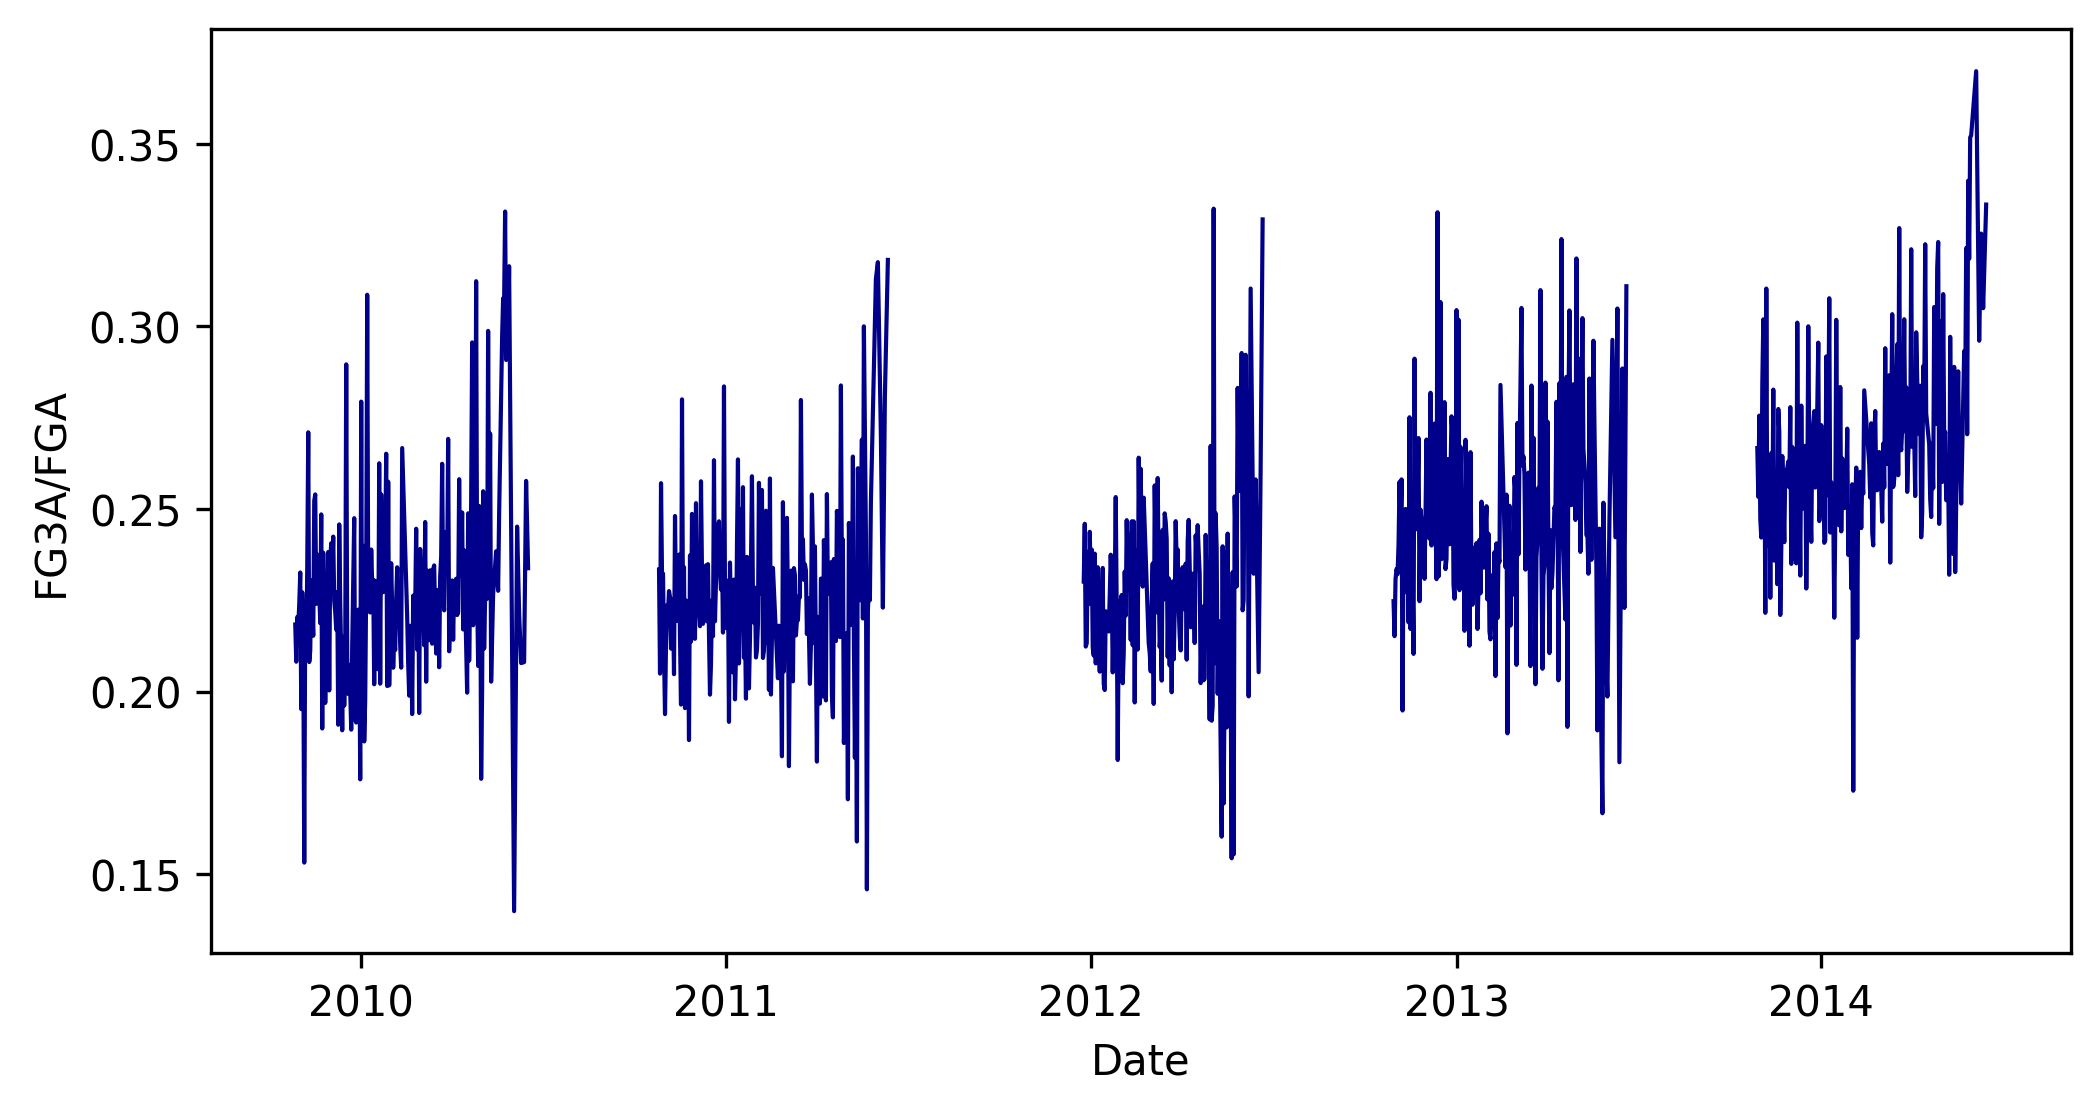

In [3]:
plt.figure(figsize=(8, 4), dpi=300)
for season in sorted(train_df.season.unique()):
    season_df = train_df[train_df.season == season]
    plt.plot(
        season_df.game_date, season_df.league_avg_fg3a_fga,
        color="darkblue", linewidth=1
    )
plt.xlabel("Date")
plt.ylabel("FG3A/FGA")
plt.savefig("plots/training-results.png", dpi=300, bbox_inches="tight")
plt.show()

## League Evaluation

In [4]:
df_arima = pd.read_csv("modeling/league_avg_fg3a_fga_predictions.csv")
df_lstm = pd.read_csv("modeling/lstm_test_predictions.csv")
df_cnn = pd.read_csv("modeling/cnn_test_predictions.csv")
df_hierarchical = pd.read_csv("modeling/hierarchical_league_data.csv")
df_prophet = pd.read_csv("modeling/prophet_league_avg_fg3a_fga_predictions.csv")

def weighted_mse(true, pred, weights):
    return (weights * (true - pred) ** 2).sum() / weights.sum()

In [5]:
# Start eval after burn-in of 4
weighted_mse(test_df.iloc[4:].league_avg_fg3a_fga.reset_index(drop=True),
             test_df.iloc[4:].league_avg_fg3a_fga.mean(),
             test_df.iloc[4:].fga.reset_index(drop=True))

0.0011967002529473009

In [6]:
# Start eval after burn-in of 4
weighted_mse(df_arima.iloc[4:].league_avg_fg3a_fga.reset_index(drop=True),
             df_arima.iloc[4:].predicted_league_avg_fg3a_fga.reset_index(drop=True),
             df_arima.iloc[4:].fga.reset_index(drop=True))

0.0012217293994651085

In [7]:
# Start eval after burn-in of 4
weighted_mse(df_prophet.iloc[4:].league_avg_fg3a_fga.reset_index(drop=True),
             df_prophet.iloc[4:].yhat.reset_index(drop=True),
             df_prophet.iloc[4:].fga.reset_index(drop=True))

0.0012327143719501222

In [8]:
# Start eval after burn-in of 4
weighted_mse(df_cnn.iloc[4:].league_avg_fg3a_fga.reset_index(drop=True),
             df_cnn.iloc[4:].Predictions.reset_index(drop=True),
             df_cnn.iloc[4:].fga.reset_index(drop=True))

0.0007502332825386093

In [9]:
# Start eval after burn-in of 4
weighted_mse(df_lstm.iloc[4:].league_avg_fg3a_fga.reset_index(drop=True),
             df_lstm.iloc[4:].Predictions.reset_index(drop=True),
             df_lstm.iloc[4:].fga.reset_index(drop=True))

0.0008844307461310866

In [10]:
# Start eval after burn-in of 4
weighted_mse(
    df_hierarchical.league_avg_fg3a_fga.iloc[4:].reset_index(drop=True),
    df_hierarchical.league_predictions.iloc[4:].reset_index(drop=True),
    df_hierarchical.fga.iloc[4:].reset_index(drop=True)
)

0.001786671243654622

## Player-Level Evaluation

In [11]:
player_data = player_data_loader(range(2018, 2020))

100%|██████████| 2/2 [00:01<00:00,  1.68it/s]


In [12]:
bl = player_data[player_data.athlete_display_name == "Brook Lopez"].reset_index(drop=True)
print(f"""BL: {weighted_mse(
    bl['fg3a_fga'].reset_index(drop=True),
    bl['fg3a_fga'].mean(),
    bl['fga'].reset_index(drop=True)
)}""")

ad = player_data[player_data.athlete_display_name == "Anthony Davis"].reset_index(drop=True)
print(f"""AD: {weighted_mse(
    ad['fg3a_fga'].reset_index(drop=True),
    ad['fg3a_fga'].mean(),
    ad['fga'].reset_index(drop=True)
)}""")

BL: 0.04261521653858811
AD: 0.006472929884358416


In [13]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions.csv")
print(f"""BL: {weighted_mse(
    df_bl['fg3a_fga'].reset_index(drop=True),
    df_bl['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_bl['fga'].reset_index(drop=True)
)}""")
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions.csv")
print(f"""AD: {weighted_mse(
    df_ad['fg3a_fga'].reset_index(drop=True),
    df_ad['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_ad['fga'].reset_index(drop=True)
)}""")

BL: 0.036613374336334735
AD: 0.007932706318454288


In [14]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions_Prophet.csv")
print(f"""BL: {weighted_mse(
    df_bl['fg3a_fga'].reset_index(drop=True),
    df_bl['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_bl['field_goals_attempted'].reset_index(drop=True)
)}""")
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_Prophet.csv")
print(f"""AD: {weighted_mse(
    df_ad['fg3a_fga'].reset_index(drop=True),
    df_ad['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_ad['field_goals_attempted'].reset_index(drop=True)
)}""")

BL: 0.03565529606323788
AD: 0.006210955868170005


In [15]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions_CNN.csv")
print(f"""BL: {weighted_mse(
    df_bl['fg3a_fga'].reset_index(drop=True),
    df_bl['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_bl['field_goals_attempted'].reset_index(drop=True)
)}""")
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_CNN.csv")
print(f"""AD: {weighted_mse(
    df_ad['fg3a_fga'].reset_index(drop=True),
    df_ad['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_ad['field_goals_attempted'].reset_index(drop=True)
)}""")

BL: 0.03597003897622514
AD: 0.006175518072333942


In [16]:
df_bl = pd.read_csv("modeling/Brook Lopez_fg3a_fga_predictions_LSTM.csv")
print(f"""BL: {weighted_mse(
    df_bl['fg3a_fga'].reset_index(drop=True),
    df_bl['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_bl['field_goals_attempted'].reset_index(drop=True)
)}""")
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_LSTM.csv")
print(f"""AD: {weighted_mse(
    df_ad['fg3a_fga'].reset_index(drop=True),
    df_ad['predicted_player_fg3a_fga'].reset_index(drop=True),
    df_ad['field_goals_attempted'].reset_index(drop=True)
)}""")

BL: 0.03615688561870693
AD: 0.006420471362642768


In [17]:
df_hierarchical = pd.read_csv("modeling/hierarchical_player_data.csv")
df_hierarchical = df_hierarchical[df_hierarchical.season.isin([2018, 2019])]
df_hierarchical.player_predictions[df_hierarchical.player_predictions < 0] = 0
h_df_ad = df_hierarchical[df_hierarchical.athlete_display_name == "Anthony Davis"]
h_df_bl = df_hierarchical[df_hierarchical.athlete_display_name == "Brook Lopez"]

print(f"""BL: {weighted_mse(
    h_df_bl['fg3a_fga'].reset_index(drop=True),
    h_df_bl['player_predictions'].reset_index(drop=True),
    h_df_bl['fga'].reset_index(drop=True)
)}""")
df_ad = pd.read_csv("modeling/Anthony Davis_fg3a_fga_predictions_LSTM.csv")
print(f"""AD: {weighted_mse(
    h_df_ad['fg3a_fga'].reset_index(drop=True),
    h_df_ad['player_predictions'].reset_index(drop=True),
    h_df_ad['fga'].reset_index(drop=True)
)}""")

BL: 0.02082938210522766
AD: 0.0017163215928190222


## Hierarchical Posthoc

[[1.         0.87273352]
 [0.87273352 1.        ]]


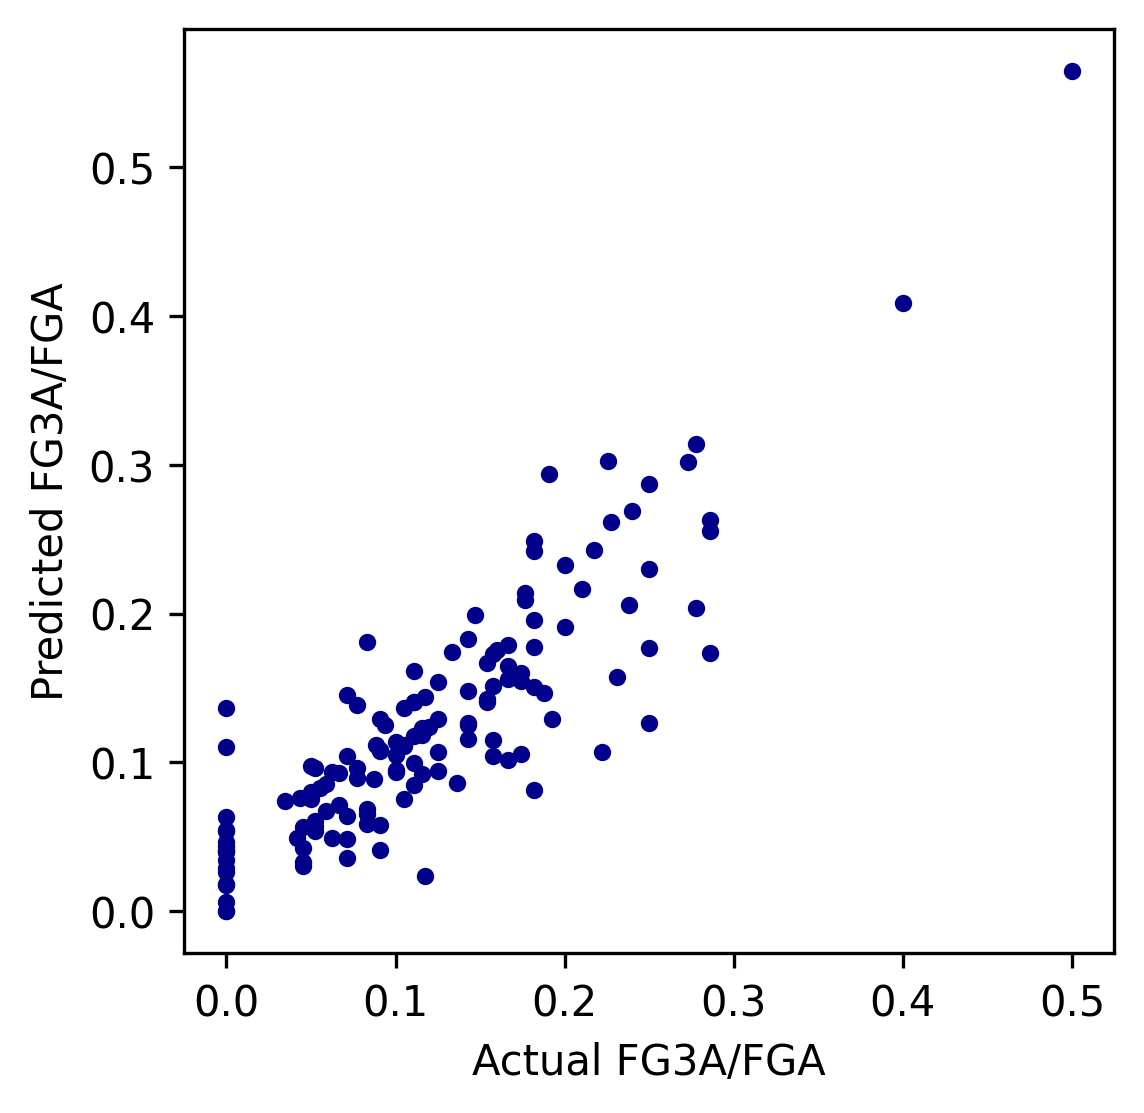

In [18]:
print(np.corrcoef(h_df_ad.fg3a_fga, h_df_ad.player_predictions))
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(h_df_ad.fg3a_fga, h_df_ad.player_predictions, s=10, color="darkblue")
plt.xlabel("Actual FG3A/FGA")
plt.ylabel("Predicted FG3A/FGA")
plt.savefig("plots/ad-pred-actual.png", dpi=300, bbox_inches="tight")
plt.show()

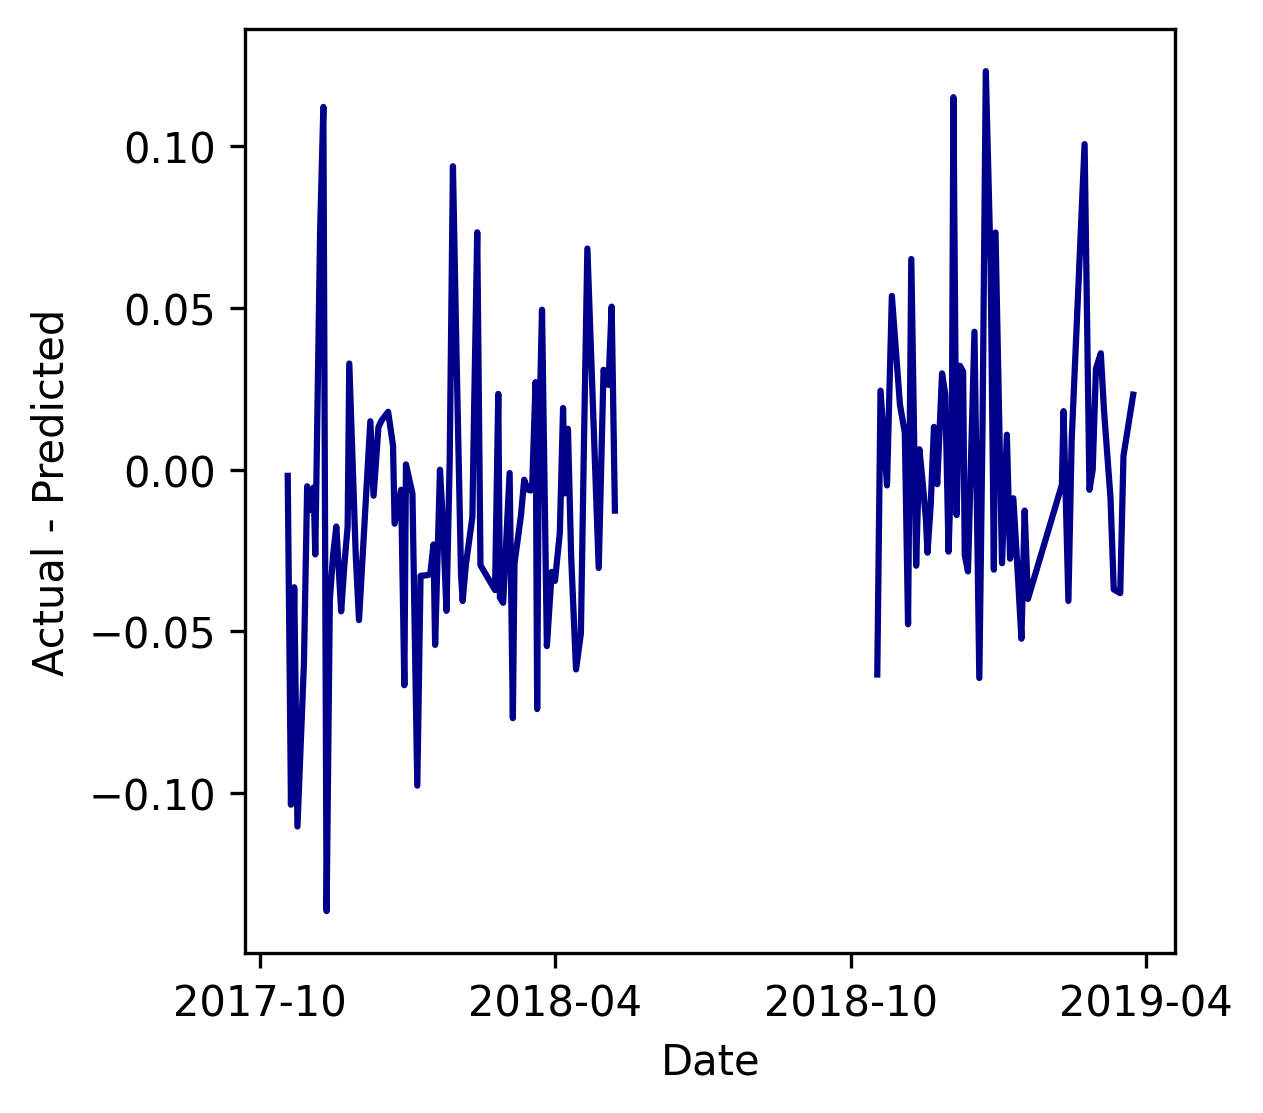

In [19]:
plt.figure(figsize=(4, 4), dpi=300)
dates = pd.to_datetime(h_df_ad.game_date)
true = h_df_ad.fg3a_fga
preds = h_df_ad.player_predictions
plt.plot(
    dates[dates < "2018-08-01"],
    (true - preds)[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    color="darkblue"
)
plt.plot(dates[dates >= "2018-08-01"], (true - preds)[dates >= "2018-08-01"], color="darkblue")
plt.xticks(["2017-10", "2018-04", "2018-10", "2019-04"], ["2017-10", "2018-04", "2018-10", "2019-04"])
plt.xlabel("Date")
plt.ylabel("Actual - Predicted")
plt.savefig("plots/ad-residuals.png", dpi=300, bbox_inches="tight")
plt.show()

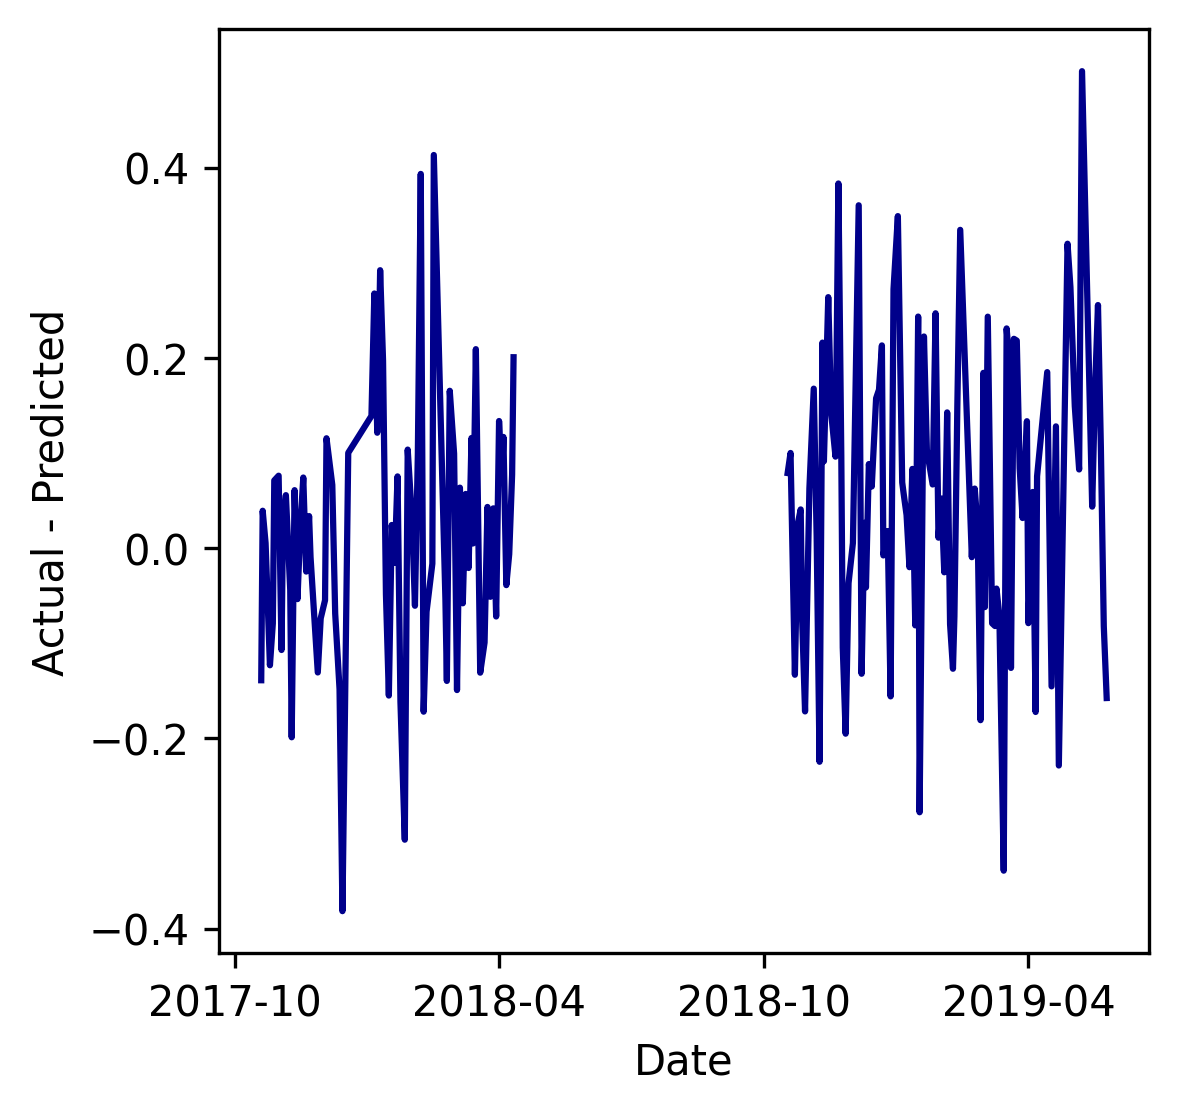

In [20]:
plt.figure(figsize=(4, 4), dpi=300)
dates = pd.to_datetime(h_df_bl.game_date)
true = h_df_bl.fg3a_fga
preds = h_df_bl.player_predictions
plt.plot(
    dates[dates < "2018-08-01"],
    (true - preds)[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    color="darkblue"
)
plt.plot(dates[dates >= "2018-08-01"], (true - preds)[dates >= "2018-08-01"], color="darkblue")
plt.xticks(["2017-10", "2018-04", "2018-10", "2019-04"], ["2017-10", "2018-04", "2018-10", "2019-04"])
plt.xlabel("Date")
plt.ylabel("Actual - Predicted")
plt.savefig("plots/bl-residuals.png", dpi=300, bbox_inches="tight")
plt.show()

[[1.         0.69314461]
 [0.69314461 1.        ]]


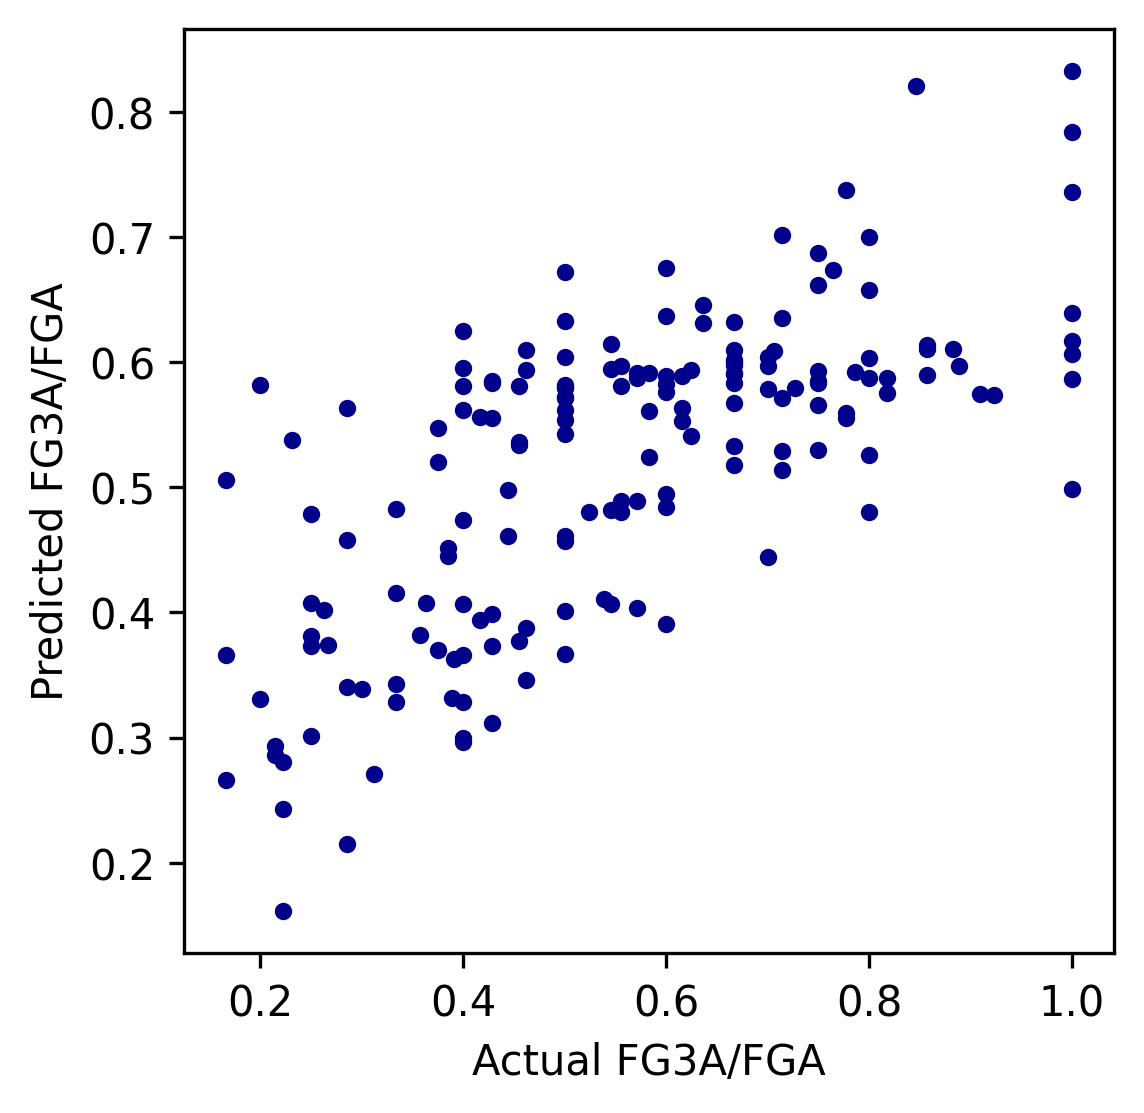

In [21]:
print(np.corrcoef(h_df_bl.fg3a_fga, h_df_bl.player_predictions))
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(h_df_bl.fg3a_fga, h_df_bl.player_predictions, s=10, color="darkblue")
plt.xlabel("Actual FG3A/FGA")
plt.ylabel("Predicted FG3A/FGA")
plt.savefig("plots/bl-pred-actual.png", dpi=300, bbox_inches="tight")
plt.show()

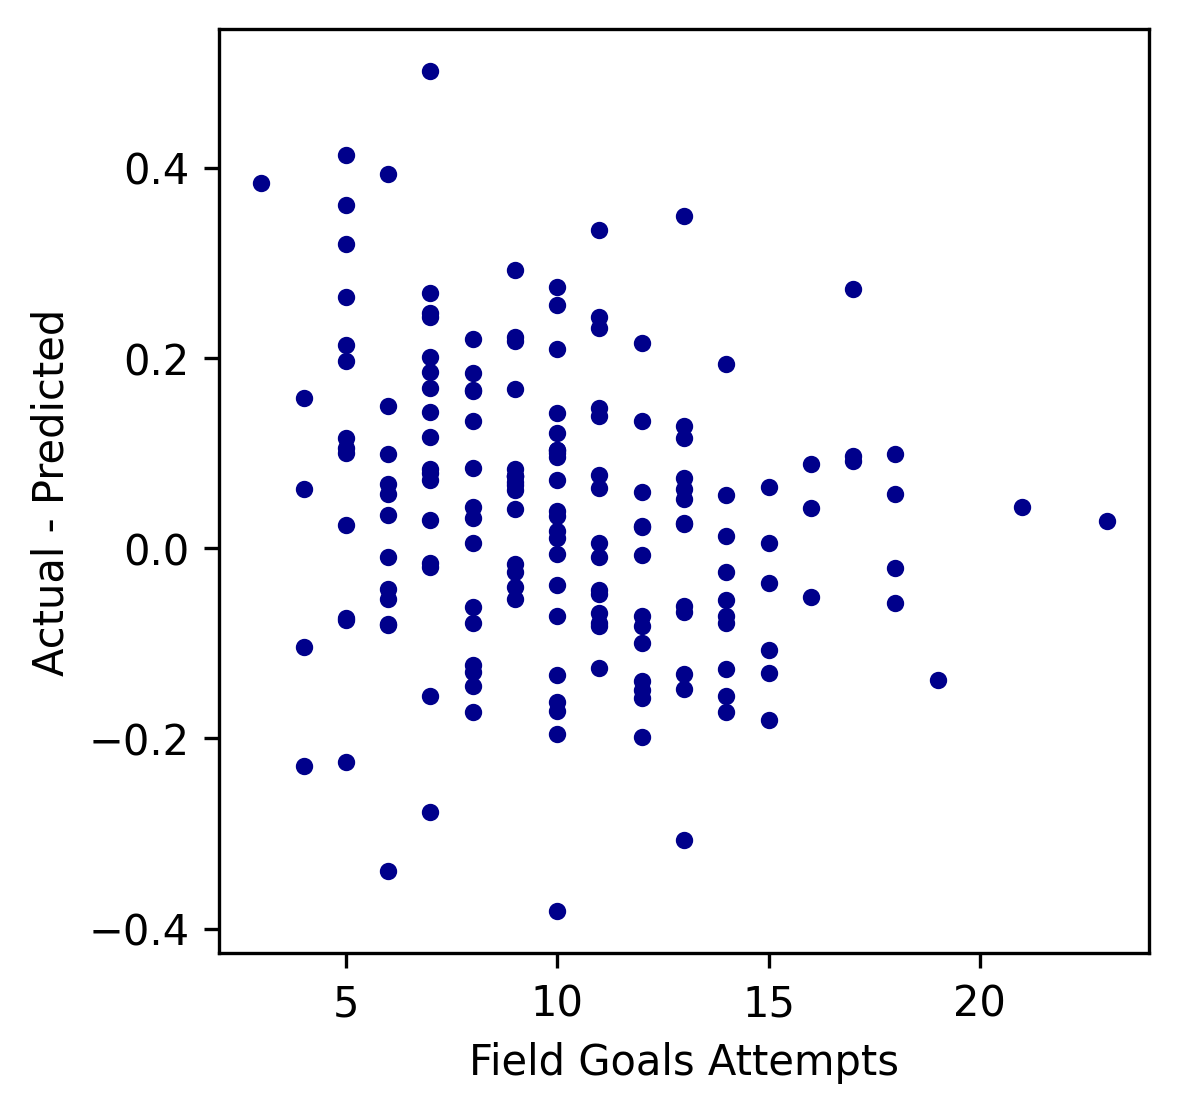

In [22]:
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(h_df_bl.fga, h_df_bl.fg3a_fga - h_df_bl.player_predictions, s=10, color="darkblue")
plt.xlabel("Field Goals Attempts")
plt.ylabel("Actual - Predicted")
plt.savefig("plots/bl-residuals-weights.png", dpi=300, bbox_inches="tight")
plt.show()

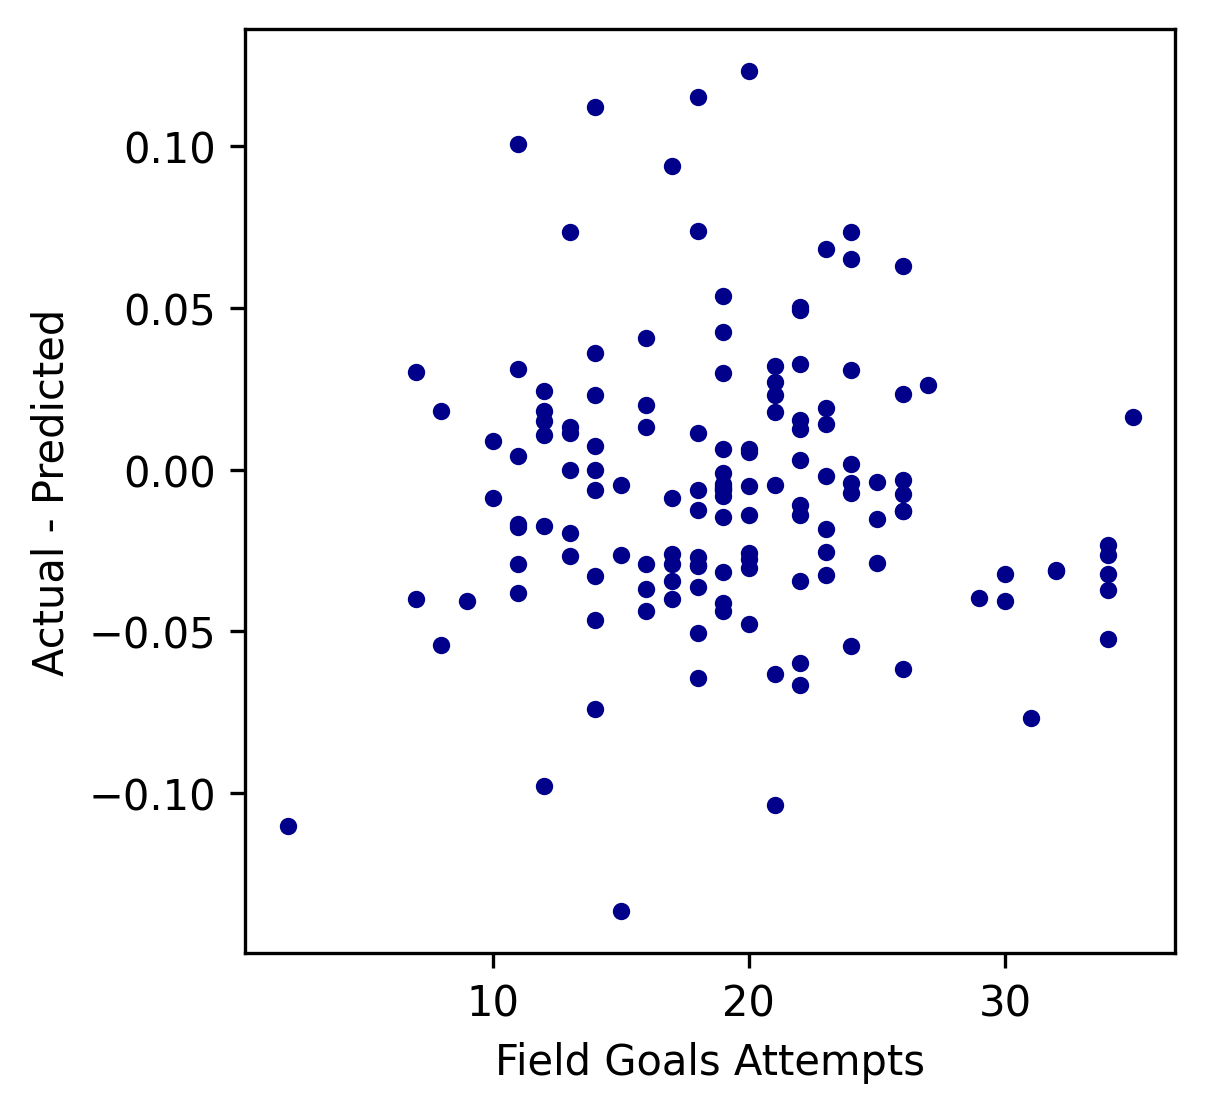

In [23]:
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(h_df_ad.fga, h_df_ad.fg3a_fga - h_df_ad.player_predictions, s=10, color="darkblue")
plt.xlabel("Field Goals Attempts")
plt.ylabel("Actual - Predicted")
plt.savefig("plots/ad-residuals-weights.png", dpi=300, bbox_inches="tight")
plt.show()

## CNN Posthoc

In [24]:
preds = df_cnn.Predictions.iloc[4:].reset_index(drop=True)
dates = pd.to_datetime(test_df.game_date.iloc[4:].reset_index(drop=True))
true = df_cnn.league_avg_fg3a_fga.iloc[4:].reset_index(drop=True)
weights = df_cnn.fga.iloc[4:].reset_index(drop=True)

[[1.         0.65035316]
 [0.65035316 1.        ]]


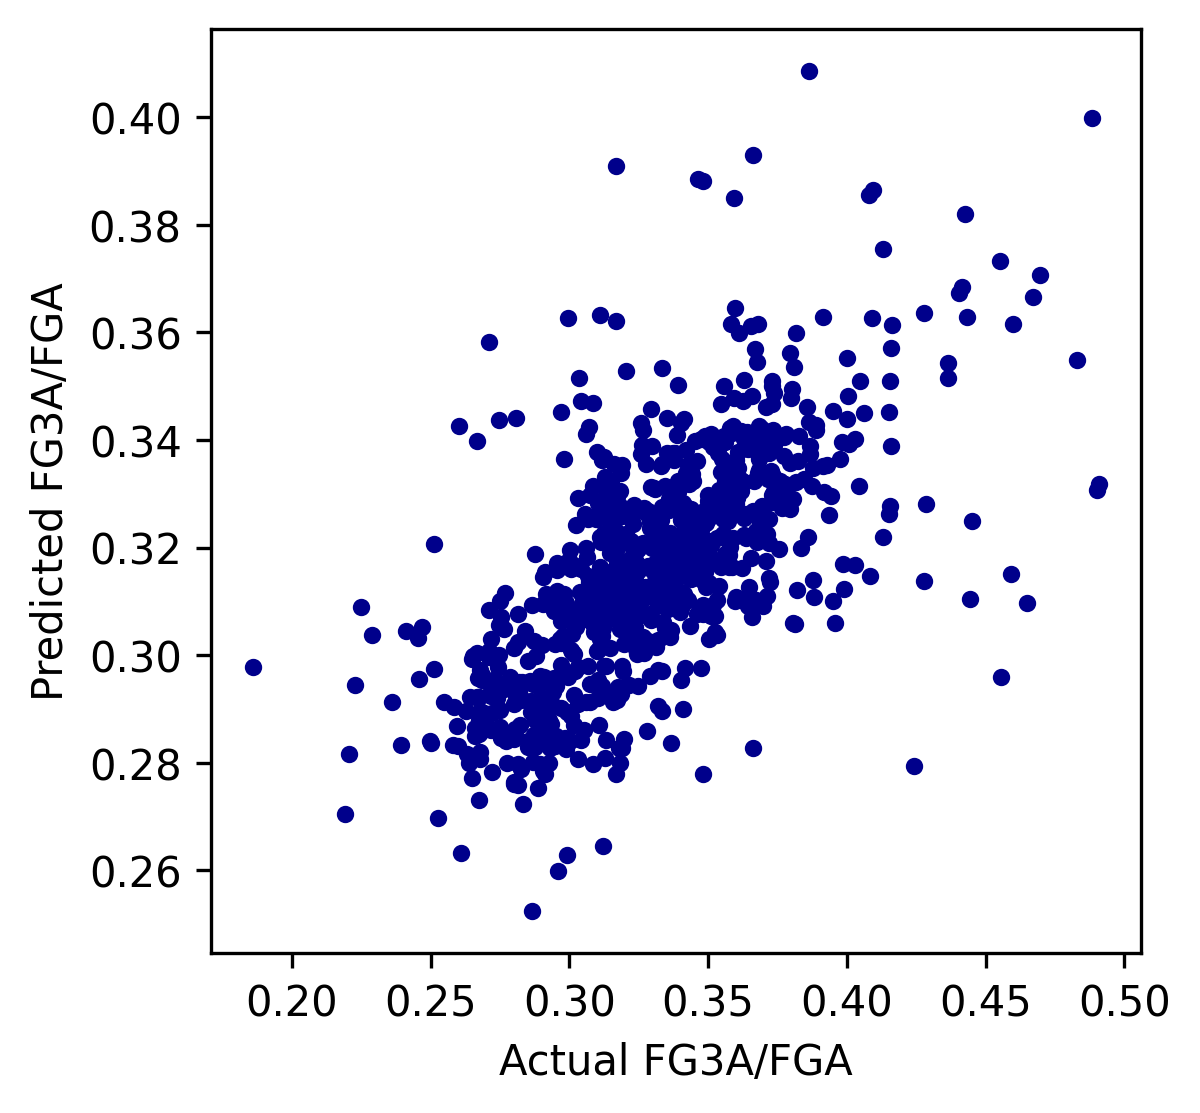

In [25]:
print(np.corrcoef(preds, true))
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(true, preds, s=10, color="darkblue")
plt.xlabel("Actual FG3A/FGA")
plt.ylabel("Predicted FG3A/FGA")
plt.savefig("plots/preds-actual.png", dpi=300, bbox_inches="tight")
plt.show()

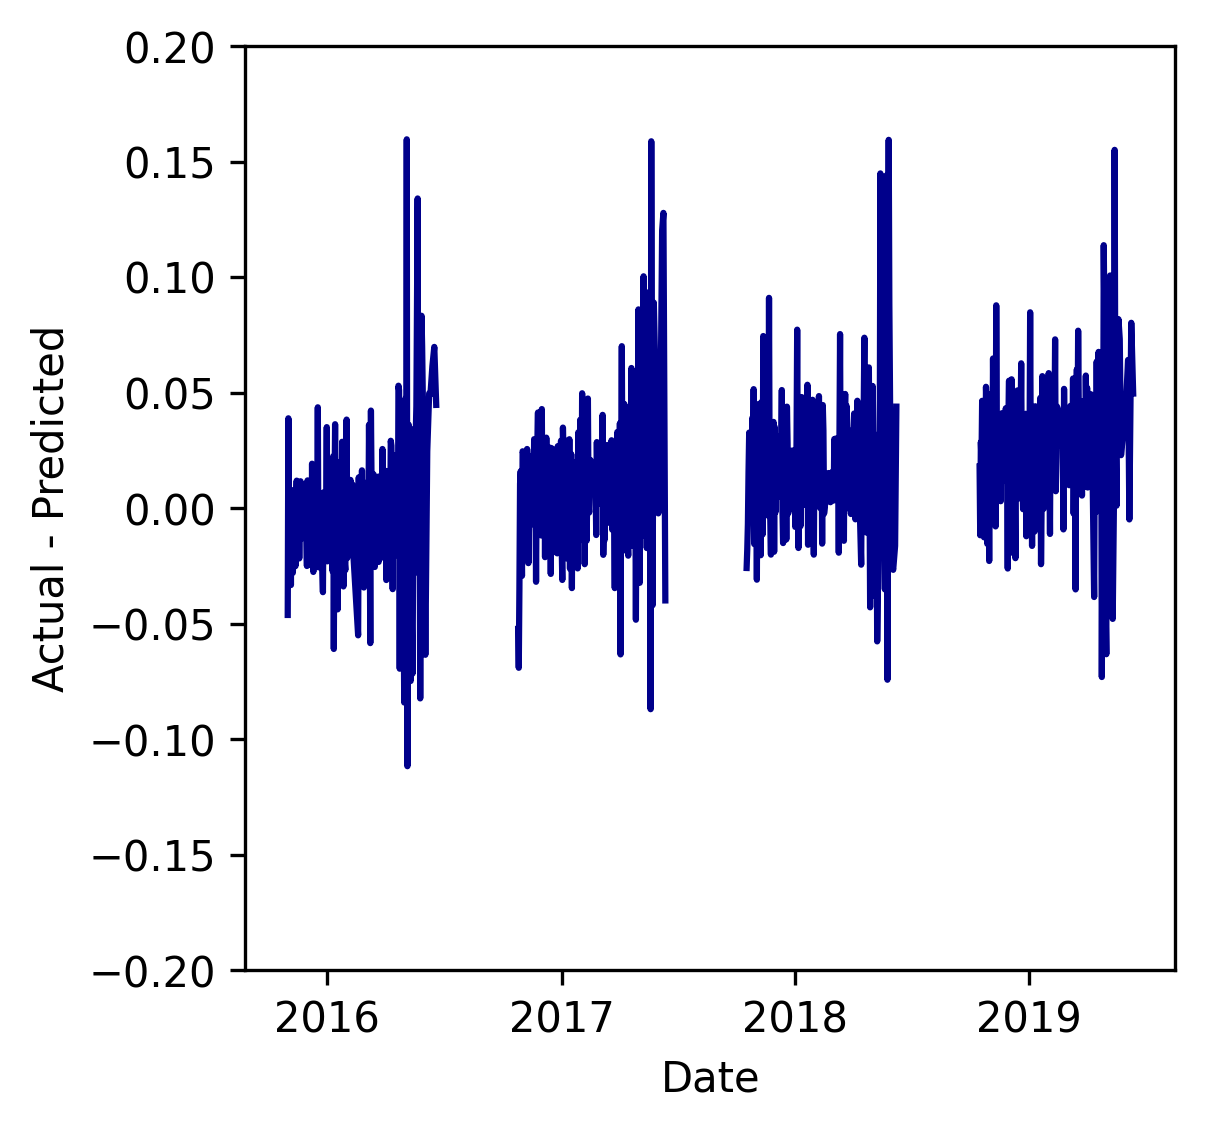

In [26]:
plt.figure(figsize=(4, 4), dpi=300)
plt.plot(dates[dates < "2016-08-01"], (true - preds)[dates < "2016-08-01"], color="darkblue")
plt.plot(
    dates[(dates < "2017-08-01") & (dates >= "2016-08-01")],
    (true - preds)[(dates < "2017-08-01") & (dates >= "2016-08-01")],
    color="darkblue"
)
plt.plot(
    dates[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    (true - preds)[(dates < "2018-08-01") & (dates >= "2017-08-01")],
    color="darkblue"
)
plt.plot(dates[dates >= "2018-08-01"], (true - preds)[dates >= "2018-08-01"], color="darkblue")
plt.xticks(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"], [*range(2016, 2020)])
plt.xlabel("Date")
plt.ylabel("Actual - Predicted")
plt.ylim(-0.2, 0.2)
plt.savefig("plots/residuals.png", dpi=300, bbox_inches="tight")
plt.show()

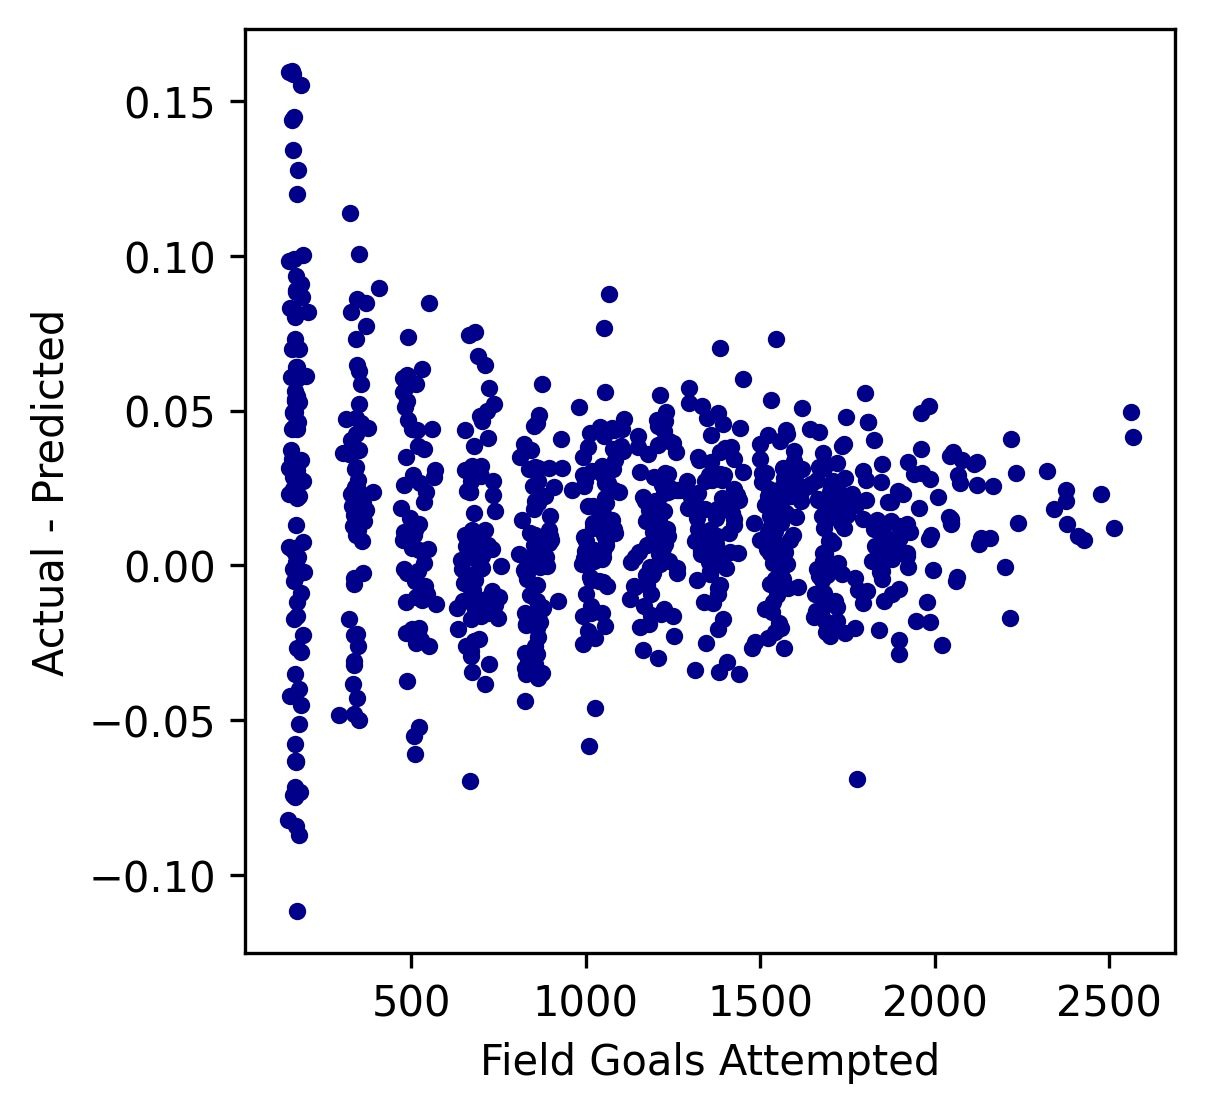

In [27]:
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(weights, true - preds, s = 10, color="darkblue")
plt.xlabel("Field Goals Attempted")
plt.ylabel("Actual - Predicted")
plt.savefig("plots/residuals-weights.png", dpi=300, bbox_inches="tight")